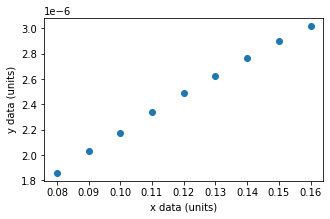

Optimised parameters =  [1.47719921e-05 6.92742612e-07] 

Covariance matrix = 
 [[ 2.88803386e-15 -3.79457530e-16]
 [-3.79457530e-16  5.15112045e-17]]


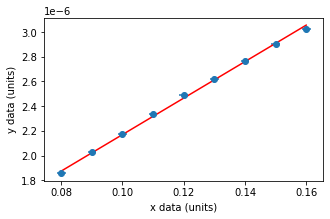

chi^2_min = 139.65813427107975
reduced chi^2 = 19.951162038725677
P(chi^2_min, DoF) = 5.99428112079982e-27
best fit slope = 1.4771992091448626e-05 units?
best fit intercept = 6.927426118874227e-07 units?
[5.37404304e-08 7.17713066e-09]
optimised parameter[0] = (1.4771992091448626e-05 +/- 5.3740430386693935e-08) units
optimised parameter[1] = (6.927426118874227e-07 +/- 7.177130657710388e-09) units


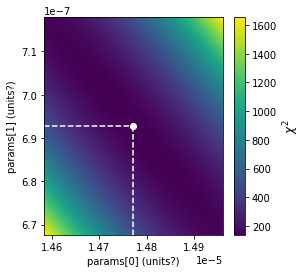

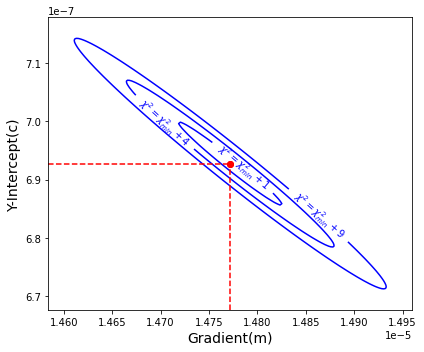

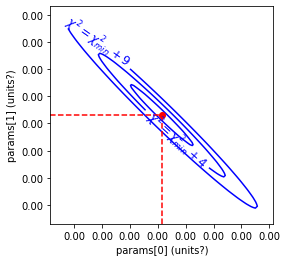

params[0] = (1.4771992149904828e-05 +/- 5.2680460147361915e-08) units
params[1] = (6.927426042319974e-07 +/- 7.0355697542129684e-09) units
Visocisty of Water 2.7619713529565018
Error in Visocisty of Water 0.04230851526323305


In [8]:
#Chi-Squared Analysis of the Data

%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import numpy as np
import scipy.optimize
import scipy.stats

density = 998.72
rel_err_rho = 0.04 / density  

x_values = 0.01*numpy.array([8,9,10,11,12,13,14,15,16])
y_values = (1 / density)*numpy.array([0.0018569416418857485, 0.002029947628426764, 0.002170401699208157, 0.0023359619697306414,
                             0.0024837642088286235, 0.002618376602250335, 0.0027648946805342704, 0.002896875985975491,
                             0.0030186681043907655])

y_errors = (1 / density) * np.array([
   0.0018569416418857485*np.sqrt((3.461461873055464e-06 / 0.0018569416418857485)**2 + rel_err_rho**2),
   0.002029947628426764*np.sqrt((1.0490696654694472e-05 / 0.002029947628426764)**2 + rel_err_rho**2),
   0.002170401699208157*np.sqrt((1.073818014289567e-05 / 0.002170401699208157)**2 + rel_err_rho**2),
   0.0023359619697306414*np.sqrt((8.408796797686467e-06 / 0.0023359619697306414)**2 + rel_err_rho**2),
   0.0024837642088286235*np.sqrt((5.983662395232003e-06 / 0.0024837642088286235)**2 + rel_err_rho**2),
   0.002618376602250335*np.sqrt((1.0005808476030678e-05 / 0.002618376602250335)**2 + rel_err_rho**2),
   0.0027648946805342704*np.sqrt((1.678482639269842e-06 / 0.0027648946805342704)**2 + rel_err_rho**2),
   0.002896875985975491*np.sqrt((5.627723147135213e-06 / 0.002896875985975491)**2 + rel_err_rho**2),
   0.0030186681043907655*np.sqrt((3.839089315707907e-06 / 0.0030186681043907655)**2 + rel_err_rho**2)
])
x_errors = 0.01*numpy.array([2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10])

plt.figure(figsize=(5,3))
plt.errorbar(x_values, 
             y_values, 
             yerr=y_errors, # use y_errors array for y error bars
             marker='o',    # circular markers at each datapoint
             linestyle='None') # no connecting lines

plt.xlabel('x data')
plt.ylabel('y data')
plt.show() 

def model_function(x, *params):
    return params[0]*x + params[1]


initial_values = numpy.array([0.5, 0.5]) # Initial guess for fit parameters

def chi_squared(model_params, model, x_data, y_data, y_err):
    return numpy.sum(((y_data - model(x_data, *model_params))/y_err)**2) # Note the `*model_params' here!

degrees_of_freedom = x_values.size - initial_values.size

popt, cov = scipy.optimize.curve_fit(model_function, # function to fit
                                     x_values, # x data
                                     y_values, # y data
                                     sigma=y_errors, # array of error bars for the fit
                                     absolute_sigma=True, # errors bars DO represent 1 std error
                                     p0=initial_values, # starting point for fit
                                     check_finite=True) # raise ValueError if NaN encountered (don't allow errors to pass)

print('Optimised parameters = ', popt, '\n')
print('Covariance matrix = \n', cov)

plt.figure(figsize=(5,3))
plt.errorbar(x_values, 
             y_values, 
             yerr=y_errors,
             xerr=x_errors,
             marker='o', 
             linestyle='None')

plt.xlabel('x data')
plt.ylabel('y data')

# Generate best fit using model function and best fit parameters, and add to plot
plt.plot(x_values, 
         model_function(x_values, *popt), 
         color='r')

plt.show()

chi_squared_min = chi_squared(popt, model_function, x_values, y_values, y_errors)
print('chi^2_min = {}'.format(chi_squared_min))
print('reduced chi^2 = {}'.format(chi_squared_min/degrees_of_freedom))
print('P(chi^2_min, DoF) = {}'.format(scipy.stats.chi2.sf(chi_squared_min, degrees_of_freedom)))

print('best fit slope = {}'.format(popt[0]))
print('best fit intercept = {}'.format(popt[1]))

popt_errs = numpy.sqrt(numpy.diag(cov))
print(popt_errs)

for i, (val, err) in enumerate(zip(popt, popt_errs)):
    print('optimised parameter[{}] = ({} +/- {})'.format(i, val, err))
    
assert(popt.size == 2) # contour plot only 'works' for 2D parameter space!

extent = 3.5 # standard errors
n_points = 100 # mesh density         

p0_range = extent * popt_errs[0]
p1_range = extent * popt_errs[1]

# Generate grid and data
p0_axis = numpy.linspace(popt[0]-p0_range, popt[0]+p0_range, num=n_points)
p1_axis = numpy.linspace(popt[1]-p1_range, popt[1]+p1_range, num=n_points)
plot_data = numpy.zeros((n_points, n_points))

for j, p1_val in enumerate(p1_axis): 
    for i, p0_val in enumerate(p0_axis): # Nested loops for 'clarity'...
        plot_data[j][i] = chi_squared([p0_val, p1_val], # function evaluated n_points*n_points times!
                                      model_function, 
                                      x_values, 
                                      y_values, 
                                      y_errors)
        
assert(popt.size == 2) # contour plot only 'works' for 2D parameter space!

plt.figure(figsize=(4,4))
im = plt.imshow(plot_data, # grid of chi-squared values
                extent=(p0_axis[0], p0_axis[-1], # 'x' range
                        p1_axis[0], p1_axis[-1]), # 'y' range
                origin='lower', aspect='auto')

plt.xlim(popt[0]-p0_range, popt[0]+p0_range) # axis ranges
plt.ylim(popt[1]-p1_range, popt[1]+p1_range)

plt.ylabel('params[1]')
plt.xlabel('params[0]')

cbar=plt.colorbar(im, orientation='vertical') # Colorbar and label
cbar.set_label('$\chi^2$', fontsize=12)

# Add in best fit point and dashed lines to the axes
plt.plot(popt[0], popt[1], 'wo') 
plt.plot((popt[0], popt[0]), (p1_axis[0], popt[1]), # vertical line
         linestyle='--', color='w')
plt.plot((p0_axis[0], popt[0]), (popt[1], popt[1]), # horizontal line
         linestyle='--', color='w')
plt.show()

assert(popt.size == 2) # contour plot only 'works' for 2D parameter space!

X, Y = numpy.meshgrid(p0_axis, p1_axis, indexing='xy')
contour_data = plot_data - chi_squared_min

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -----------------------------------------
# 1. Data
# -----------------------------------------
x_values = 0.01*numpy.array([8,9,10,11,12,13,14,15,16])
y_values = (1 / density)*numpy.array([0.0018569416418857485, 0.002029947628426764, 0.002170401699208157, 0.0023359619697306414,
                             0.0024837642088286235, 0.002618376602250335, 0.0027648946805342704, 0.002896875985975491,
                             0.0030186681043907655])
y_errors = (1 / density) * np.array([
   0.0018569416418857485*np.sqrt((3.461461873055464e-06 / 0.0018569416418857485)**2 + rel_err_rho**2),
   0.002029947628426764*np.sqrt((1.0490696654694472e-05 / 0.002029947628426764)**2 + rel_err_rho**2),
   0.002170401699208157*np.sqrt((1.073818014289567e-05 / 0.002170401699208157)**2 + rel_err_rho**2),
   0.0023359619697306414*np.sqrt((8.408796797686467e-06 / 0.0023359619697306414)**2 + rel_err_rho**2),
   0.0024837642088286235*np.sqrt((5.983662395232003e-06 / 0.0024837642088286235)**2 + rel_err_rho**2),
   0.002618376602250335*np.sqrt((1.0005808476030678e-05 / 0.002618376602250335)**2 + rel_err_rho**2),
   0.0027648946805342704*np.sqrt((1.678482639269842e-06 / 0.0027648946805342704)**2 + rel_err_rho**2),
   0.002896875985975491*np.sqrt((5.627723147135213e-06 / 0.002896875985975491)**2 + rel_err_rho**2),
   0.0030186681043907655*np.sqrt((3.839089315707907e-06 / 0.0030186681043907655)**2 + rel_err_rho**2)
])

# -----------------------------------------
# 2. Model and chi-squared
# -----------------------------------------
def model(x, m, c):
    return m*x + c

def chi2(params):
    m, c = params
    return np.sum(((y_values - model(x_values, m, c)) / y_errors)**2)

# -----------------------------------------
# 3. Fit the model
# -----------------------------------------
popt, pcov = curve_fit(model, x_values, y_values,
                       sigma=y_errors, absolute_sigma=True)

m_best, c_best = popt
chi2_min = chi2(popt)
perr = np.sqrt(np.diag(pcov))

# -----------------------------------------
# 4. Build chi2 grid (adaptive range)
# -----------------------------------------
levels = [1, 4, 9]
mult = 3.5
max_mult = 1e6

def make_grid(mult):
    m_range = mult * perr[0]
    c_range = mult * perr[1]
    m_axis = np.linspace(m_best - m_range, m_best + m_range, 180)
    c_axis = np.linspace(c_best - c_range, c_best + c_range, 180)
    M, C = np.meshgrid(m_axis, c_axis)
    Z = np.zeros_like(M)
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            Z[i,j] = chi2([M[i,j], C[i,j]]) - chi2_min
    return m_axis, c_axis, Z

while True:
    m_axis, c_axis, Z = make_grid(mult)
    if Z.max() > 9:
        break
    mult *= 2
    if mult > max_mult:
        raise RuntimeError("Could not find Δχ²=9 region — range too small")

# -----------------------------------------
# 5. Plot ONLY the 3 blue contour lines
# -----------------------------------------
plt.figure(figsize=(6,5))

# Blue contour lines only
CS = plt.contour(m_axis, c_axis, Z, levels=levels, colors='blue')
plt.clabel(CS, inline=True, fontsize=10, fmt={1: "$\chi^2 = \chi^2_{min}+1$", 4: "$\chi^2 = \chi^2_{min}+4$", 9: "$\chi^2 = \chi^2_{min}+9$"})

# Best-fit point
plt.plot(m_best, c_best, 'ro')
# Add in best fit point and dashed lines to the axes
plt.plot(popt[0], popt[1], 'ro') 
plt.plot((popt[0], popt[0]), (p1_axis[0], popt[1]), linestyle='--', color='r')
plt.plot((p0_axis[0], popt[0]), (popt[1], popt[1]), linestyle='--', color='r')


plt.xlabel("Gradient(m)", fontsize=14)
plt.ylabel("Y-Intercept(c)", fontsize=14)
plt.tight_layout()
plt.show()

levels = [1, 4, 9] # Contour levels in delta chi-squared of 1, 4 & 9 correspond to 1, 2 & 3 standard errors
plt.figure(figsize=(4,4))

#Plot and label contours: (comment out labelling to remove text over contours)
contour_plot = plt.contour(X, Y, contour_data, levels=levels, colors='b', origin='lower')
plt.clabel(contour_plot, levels, fontsize=12, inline=1, fmt=r'$\chi^2 = \chi^2_{min}+%1.0f$') 

plt.xlabel('params[0]') 
plt.ylabel('params[1]')

import matplotlib.ticker as ticker # Allows you to modify the tick markers to 
xtick_spacing = p0_range/4         # assess the errors from the chi-squared 
ytick_spacing = p1_range/4         # contour plots - set as appropriate
 
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(xtick_spacing))
ax.xaxis.set_major_formatter('{x:.2f}') # 2 decimal places - may or may not be appropriate!

ax.yaxis.set_major_locator(ticker.MultipleLocator(ytick_spacing))
ax.yaxis.set_major_formatter('{x:.2f}') # 2 decimal places - may or may not be appropriate!

# Add in best fit point and dashed lines to the axes
plt.plot(popt[0], popt[1], 'ro') 
plt.plot((popt[0], popt[0]), (p1_axis[0], popt[1]), linestyle='--', color='r')
plt.plot((p0_axis[0], popt[0]), (popt[1], popt[1]), linestyle='--', color='r')
plt.show()

assert(popt.size == 2) # contour plot only 'works' for 2D parameter space!

contours = contour_plot.collections[0].get_paths() # Get the contours from the plot
onesigma_contour = contours[0].vertices # Get the set of points constituting the one confidence-interval contour
      
# Get the extrema along the two axes - max and min values. These should be symmetric about the solution.
maxs = numpy.amax(onesigma_contour, axis=0)   
mins = numpy.amin(onesigma_contour, axis=0)   
errs_graphical = (maxs - mins)/2  # Half the difference is one standard error in the parameters

for i, (v, e) in enumerate(zip(popt, errs_graphical)):
    print('params[{}] = ({} +/- {})'.format(i, v, e))  

def p(T):
    
    return (999.85308 + 6.3269*10**(-2)*T - 8.523829*10**(-3)*T**2 + 6.943248*10**(-5)*T**3 -3.821216*10**(-7)*T**4)    
    
n=((numpy.pi*p(17.3)*9.80665*(1.125*10**-3)**4)/(8*1.4771992149904828e-05*0.151))*1000

print('Visocisty of Water', n)

T=[17.1,17.5]

def std_dev(X):

    mean = sum(X)/len(X)

    variance = sum((x - mean) ** 2 for x in X) / (len(X) - 1)

    return variance ** 0.5

a_a = numpy.sqrt(2*0.005**2)
a_l = numpy.sqrt(2*0.05**2)

a_n = n*numpy.sqrt(((abs(p(17.3+std_dev(T)/numpy.sqrt(2))-p(17.3)))/p(17.3))**2 + ((4*a_a)/2)**2 + (5.2680460147361915e-08/1.4771992149904828e-05)**2 + (a_l/15.1)**2)

print('Error in Visocisty of Water', a_n)

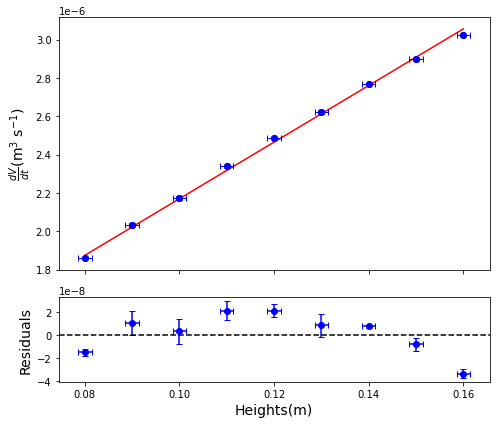

In [7]:
#Straight Line Graph for the Above Data

xvalues = 0.01*numpy.array([8,9,10,11,12,13,14,15,16])
yvalues = (1 / density)*numpy.array([0.0018569416418857485, 0.002029947628426764, 0.002170401699208157, 0.0023359619697306414,
                             0.0024837642088286235, 0.002618376602250335, 0.0027648946805342704, 0.002896875985975491,
                             0.0030186681043907655])
yerrors = (1 / density) * np.array([
   0.0018569416418857485*np.sqrt((3.461461873055464e-06 / 0.0018569416418857485)**2 + rel_err_rho**2),
   0.002029947628426764*np.sqrt((1.0490696654694472e-05 / 0.002029947628426764)**2 + rel_err_rho**2),
   0.002170401699208157*np.sqrt((1.073818014289567e-05 / 0.002170401699208157)**2 + rel_err_rho**2),
   0.0023359619697306414*np.sqrt((8.408796797686467e-06 / 0.0023359619697306414)**2 + rel_err_rho**2),
   0.0024837642088286235*np.sqrt((5.983662395232003e-06 / 0.0024837642088286235)**2 + rel_err_rho**2),
   0.002618376602250335*np.sqrt((1.0005808476030678e-05 / 0.002618376602250335)**2 + rel_err_rho**2),
   0.0027648946805342704*np.sqrt((1.678482639269842e-06 / 0.0027648946805342704)**2 + rel_err_rho**2),
   0.002896875985975491*np.sqrt((5.627723147135213e-06 / 0.002896875985975491)**2 + rel_err_rho**2),
   0.0030186681043907655*np.sqrt((3.839089315707907e-06 / 0.0030186681043907655)**2 + rel_err_rho**2)
])

xerrors = 0.01*numpy.array([2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10])


import scipy.optimize as scpo 

def Line1(x, gradient1, intercept1): 
    
    return gradient1*x + intercept1  

fit_gradient1 = 1.4771992149904828e-05

fit_intercept1 = 6.927426042319974e-07

ybestfit1 = Line1(xvalues, fit_gradient1, fit_intercept1) 

residuals1 = (yvalues - ybestfit1)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios':[3,1]},figsize=(7,6))

ax1.scatter(xvalues, yvalues, color="blue")
ax1.plot(xvalues, ybestfit1, color="red")

ax1.errorbar(xvalues, yvalues, xerr=xerrors, yerr=yerrors,fmt='o', color="blue", elinewidth=1, capsize=3)

ax1.set_ylabel(r"$\frac{dV}{dt}$(m$^3$ s$^{-1}$)", fontsize=14)

ax2.errorbar(xvalues, residuals1, xerr=xerrors, yerr=yerrors, fmt='o', color="blue", capsize=3)

ax2.axhline(0, color="black", linestyle="--")
ax2.set_xlabel("Heights(m)", fontsize=14)
ax2.set_ylabel("Residuals", fontsize=14)

plt.tight_layout()
plt.show()

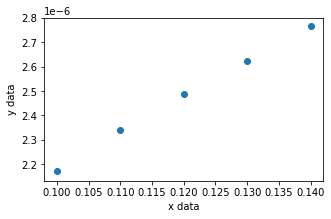

Optimised parameters =  [1.44687686e-05 7.43104421e-07] 

Covariance matrix = 
 [[ 2.96305251e-14 -4.04600145e-15]
 [-4.04600145e-15  5.54895991e-16]]


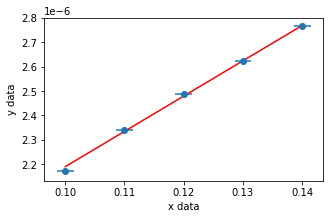

chi^2_min = 4.388306310054907
reduced chi^2 = 1.4627687700183023
P(chi^2_min, DoF) = 0.22247211631378294
best fit slope = 1.4468768623932184e-05
best fit intercept = 7.431044208762232e-07


In [16]:
#Re-Calculating Chi-Squared for Less Data Points

x_values = 0.01*numpy.array([10,11,12,13,14])
y_values = (1 / density)*numpy.array([ 0.002170401699208157,0.0023359619697306414,
                             0.0024837642088286235, 0.002618376602250335, 0.0027648946805342704])

y_errors = (1 / density) * np.array([

   0.002170401699208157*np.sqrt((1.073818014289567e-05 / 0.002170401699208157)**2 + rel_err_rho**2),
   0.0023359619697306414*np.sqrt((8.408796797686467e-06 / 0.0023359619697306414)**2 + rel_err_rho**2),
   0.0024837642088286235*np.sqrt((5.983662395232003e-06 / 0.0024837642088286235)**2 + rel_err_rho**2),
   0.002618376602250335*np.sqrt((1.0005808476030678e-05 / 0.002618376602250335)**2 + rel_err_rho**2),
   0.0027648946805342704*np.sqrt((1.678482639269842e-06 / 0.0027648946805342704)**2 + rel_err_rho**2)
])
x_errors = 0.01*numpy.array([2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10])

plt.figure(figsize=(5,3))
plt.errorbar(x_values, 
             y_values, 
             yerr=y_errors, # use y_errors array for y error bars
             marker='o',    # circular markers at each datapoint
             linestyle='None') # no connecting lines

plt.xlabel('x data')
plt.ylabel('y data')
plt.show() 

def model_function(x, *params):
    return params[0]*x + params[1]


initial_values = numpy.array([0.5, 0.5]) # Initial guess for fit parameters

def chi_squared(model_params, model, x_data, y_data, y_err):
    return numpy.sum(((y_data - model(x_data, *model_params))/y_err)**2) # Note the `*model_params' here!

degrees_of_freedom = x_values.size - initial_values.size

popt, cov = scipy.optimize.curve_fit(model_function, # function to fit
                                     x_values, # x data
                                     y_values, # y data
                                     sigma=y_errors, # array of error bars for the fit
                                     absolute_sigma=True, # errors bars DO represent 1 std error
                                     p0=initial_values, # starting point for fit
                                     check_finite=True) # raise ValueError if NaN encountered (don't allow errors to pass)

print('Optimised parameters = ', popt, '\n')
print('Covariance matrix = \n', cov)

plt.figure(figsize=(5,3))
plt.errorbar(x_values, 
             y_values, 
             yerr=y_errors,
             xerr=x_errors,
             marker='o', 
             linestyle='None')

plt.xlabel('x data')
plt.ylabel('y data')

# Generate best fit using model function and best fit parameters, and add to plot
plt.plot(x_values, 
         model_function(x_values, *popt), 
         color='r')

plt.show()

chi_squared_min = chi_squared(popt, model_function, x_values, y_values, y_errors)
print('chi^2_min = {}'.format(chi_squared_min))
print('reduced chi^2 = {}'.format(chi_squared_min/degrees_of_freedom))
print('P(chi^2_min, DoF) = {}'.format(scipy.stats.chi2.sf(chi_squared_min, degrees_of_freedom)))

print('best fit slope = {}'.format(popt[0]))
print('best fit intercept = {}'.format(popt[1]))

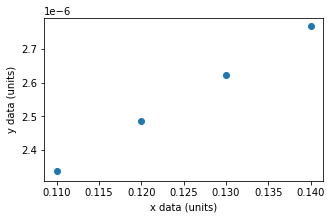

Optimised parameters =  [1.42216411e-05 7.77401737e-07] 

Covariance matrix = 
 [[ 4.55626551e-14 -6.25712405e-15]
 [-6.25712405e-15  8.61764134e-16]]


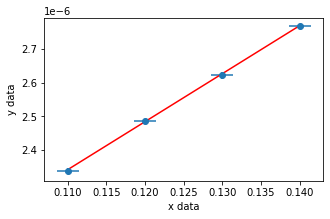

chi^2_min = 0.555045805375709
reduced chi^2 = 0.2775229026878545
P(chi^2_min, DoF) = 0.7576582119947347
best fit slope = 1.4221641078599079e-05
best fit intercept = 7.774017374746968e-07


In [14]:
#Re-Calculating Chi-Squared for Less Data Points

x_values = 0.01*numpy.array([11,12,13,14])
y_values = (1 / density)*numpy.array([0.0023359619697306414,
                             0.0024837642088286235, 0.002618376602250335, 0.0027648946805342704])

y_errors = (1 / density) * np.array([


   0.0023359619697306414*np.sqrt((8.408796797686467e-06 / 0.0023359619697306414)**2 + rel_err_rho**2),
   0.0024837642088286235*np.sqrt((5.983662395232003e-06 / 0.0024837642088286235)**2 + rel_err_rho**2),
   0.002618376602250335*np.sqrt((1.0005808476030678e-05 / 0.002618376602250335)**2 + rel_err_rho**2),
   0.0027648946805342704*np.sqrt((1.678482639269842e-06 / 0.0027648946805342704)**2 + rel_err_rho**2)
])
x_errors = 0.01*numpy.array([ 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10])

plt.figure(figsize=(5,3))
plt.errorbar(x_values, 
             y_values, 
             yerr=y_errors, # use y_errors array for y error bars
             marker='o',    # circular markers at each datapoint
             linestyle='None') # no connecting lines

plt.xlabel('x data')
plt.ylabel('y data')
plt.show() 

def model_function(x, *params):
    return params[0]*x + params[1]


initial_values = numpy.array([0.5, 0.5]) # Initial guess for fit parameters

def chi_squared(model_params, model, x_data, y_data, y_err):
    return numpy.sum(((y_data - model(x_data, *model_params))/y_err)**2) # Note the `*model_params' here!

degrees_of_freedom = x_values.size - initial_values.size

popt, cov = scipy.optimize.curve_fit(model_function, # function to fit
                                     x_values, # x data
                                     y_values, # y data
                                     sigma=y_errors, # array of error bars for the fit
                                     absolute_sigma=True, # errors bars DO represent 1 std error
                                     p0=initial_values, # starting point for fit
                                     check_finite=True) # raise ValueError if NaN encountered (don't allow errors to pass)

print('Optimised parameters = ', popt, '\n')
print('Covariance matrix = \n', cov)

plt.figure(figsize=(5,3))
plt.errorbar(x_values, 
             y_values, 
             yerr=y_errors,
             xerr=x_errors,
             marker='o', 
             linestyle='None')

plt.xlabel('x data')
plt.ylabel('y data')

# Generate best fit using model function and best fit parameters, and add to plot
plt.plot(x_values, 
         model_function(x_values, *popt), 
         color='r')

plt.show()

chi_squared_min = chi_squared(popt, model_function, x_values, y_values, y_errors)
print('chi^2_min = {}'.format(chi_squared_min))
print('reduced chi^2 = {}'.format(chi_squared_min/degrees_of_freedom))
print('P(chi^2_min, DoF) = {}'.format(scipy.stats.chi2.sf(chi_squared_min, degrees_of_freedom)))

print('best fit slope = {}'.format(popt[0]))
print('best fit intercept = {}'.format(popt[1]))

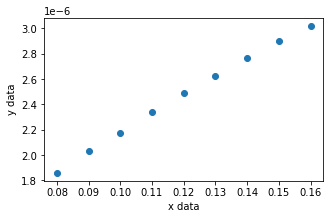

Optimised parameters =  [-2.91465091e-05  2.15581306e-05  3.20974264e-07] 

Covariance matrix = 
 [[ 6.21943565e-12 -1.44806196e-12  7.93298869e-14]
 [-1.44806196e-12  3.40038147e-13 -1.88497171e-14]
 [ 7.93298869e-14 -1.88497171e-14  1.06337647e-15]]


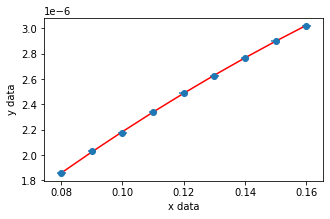

chi^2_min = 3.0672516300702375
reduced chi^2 = 0.5112086050117063
P(chi^2_min, DoF) = 0.8003599581960595
optimised parameter[0] = (-2.9146509117952686e-05 +/- 2.4938796388248153e-06)
optimised parameter[1] = (2.155813064879964e-05 +/- 5.83127899028703e-07)
optimised parameter[2] = (3.209742635728366e-07 +/- 3.2609453764362154e-08)


In [15]:
#Re-Calculating Chi-Squared for a Diffrent Model: Quadratic

x_values = 0.01*numpy.array([8,9,10,11,12,13,14,15,16])
y_values = (1 / density)*numpy.array([0.0018569416418857485, 0.002029947628426764, 0.002170401699208157, 0.0023359619697306414,
                             0.0024837642088286235, 0.002618376602250335, 0.0027648946805342704, 0.002896875985975491,
                             0.0030186681043907655])

y_errors = (1 / density) * np.array([
   0.0018569416418857485*np.sqrt((3.461461873055464e-06 / 0.0018569416418857485)**2 + rel_err_rho**2),
   0.002029947628426764*np.sqrt((1.0490696654694472e-05 / 0.002029947628426764)**2 + rel_err_rho**2),
   0.002170401699208157*np.sqrt((1.073818014289567e-05 / 0.002170401699208157)**2 + rel_err_rho**2),
   0.0023359619697306414*np.sqrt((8.408796797686467e-06 / 0.0023359619697306414)**2 + rel_err_rho**2),
   0.0024837642088286235*np.sqrt((5.983662395232003e-06 / 0.0024837642088286235)**2 + rel_err_rho**2),
   0.002618376602250335*np.sqrt((1.0005808476030678e-05 / 0.002618376602250335)**2 + rel_err_rho**2),
   0.0027648946805342704*np.sqrt((1.678482639269842e-06 / 0.0027648946805342704)**2 + rel_err_rho**2),
   0.002896875985975491*np.sqrt((5.627723147135213e-06 / 0.002896875985975491)**2 + rel_err_rho**2),
   0.0030186681043907655*np.sqrt((3.839089315707907e-06 / 0.0030186681043907655)**2 + rel_err_rho**2)
])
x_errors = 0.01*numpy.array([2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10, 2**0.5/10])

plt.figure(figsize=(5,3))
plt.errorbar(x_values, 
             y_values, 
             yerr=y_errors, # use y_errors array for y error bars
             marker='o',    # circular markers at each datapoint
             linestyle='None') # no connecting lines

plt.xlabel('x data') 
plt.ylabel('y data')
plt.show() 

def model_function(x, *params):
    return params[0]*x**2 + params[1]*x+params[2]


initial_values = numpy.array([0.5, 0.5,0.5]) # Initial guess for fit parameters

def chi_squared(model_params, model, x_data, y_data, y_err):
    return numpy.sum(((y_data - model(x_data, *model_params))/y_err)**2) # Note the `*model_params' here!

degrees_of_freedom = x_values.size - initial_values.size

popt, cov = scipy.optimize.curve_fit(model_function, # function to fit
                                     x_values, # x data
                                     y_values, # y data
                                     sigma=y_errors, # array of error bars for the fit
                                     absolute_sigma=True, # errors bars DO represent 1 std error
                                     p0=initial_values, # starting point for fit
                                     check_finite=True) # raise ValueError if NaN encountered (don't allow errors to pass)

print('Optimised parameters = ', popt, '\n')
print('Covariance matrix = \n', cov)

plt.figure(figsize=(5,3))
plt.errorbar(x_values, 
             y_values, 
             yerr=y_errors,
             xerr=x_errors,
             marker='o', 
             linestyle='None')

plt.xlabel('x data') 
plt.ylabel('y data')

# Generate best fit using model function and best fit parameters, and add to plot
plt.plot(x_values, 
         model_function(x_values, *popt), 
         color='r')

plt.show()

chi_squared_min = chi_squared(popt, model_function, x_values, y_values, y_errors)
print('chi^2_min = {}'.format(chi_squared_min))
print('reduced chi^2 = {}'.format(chi_squared_min/degrees_of_freedom))
print('P(chi^2_min, DoF) = {}'.format(scipy.stats.chi2.sf(chi_squared_min, degrees_of_freedom)))

for i, (val, err) in enumerate(zip(popt, popt_errs)):
    print('optimised parameter[{}] = ({} +/- {})'.format(i, val, err))